In [1]:
import glob
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns',130)

In [8]:
df1 = pd.read_csv("C:\\Users\\MICROSOFT\\OneDrive\\Untitled Folder\\data\\jakarta.csv")
df2 = pd.read_csv("C:\\Users\\MICROSOFT\\OneDrive\\Untitled Folder\\data\\bogor.csv")
df3 = pd.read_csv("C:\\Users\\MICROSOFT\\OneDrive\\Untitled Folder\\data\\depok.csv")
df4 = pd.read_csv("C:\\Users\\MICROSOFT\\OneDrive\\Untitled Folder\\data\\tangerang.csv")
df5 = pd.read_csv("C:\\Users\\MICROSOFT\\OneDrive\\Untitled Folder\\data\\bekasi.csv")

df = pd.concat([df1, df2, df3, df4, df5], axis=1, join='inner')

print (df.head())

   created_at     LT     LB   KT   KM  garasi  carport         lokasi  \
0  06-12-2021  202.0  198.0  8.0  3.0     NaN      NaN  Jakarta Pusat   
1  02-12-2021   30.0   55.0  2.0  1.0     NaN      1.0  Jakarta Pusat   
2  06-12-2021   19.0   35.0  2.0  1.0     NaN      NaN  Jakarta Pusat   
3  06-12-2021   33.0   42.0  2.0  2.0     NaN      1.0  Jakarta Pusat   
4  06-12-2021   30.0   55.0  2.0  2.0     NaN      1.0  Jakarta Pusat   

  sertifikat  listrik hadap         harga  \
0        SHM   2200.0   NaN  4.500000e+09   
1        SHM   2200.0   NaN  1.100000e+09   
2        SHM   2200.0   NaN  3.950000e+08   
3        SHM   2200.0   NaN  8.350000e+08   
4        SHM   2200.0   NaN  1.100000e+09   

                                                 URL  \
0  https://www.rumah.com/listing-properti/dijual-...   
1  https://www.rumah.com/listing-properti/dijual-...   
2  https://www.rumah.com/listing-properti/dijual-...   
3  https://www.rumah.com/listing-properti/dijual-...   
4  https:/

In [25]:
df[["LT","LB","KT","KM"]]
df[:108]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,6.925500e+08,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,8.114000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,9.005000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,1.001900e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,1.200800e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,02-12-2021,437.0,340.0,5.0,5.0,2.0,2.0,Megamendung,SHGB,5500.0,5.500000e+09,https://www.rumah123.com/properti/bogor/hos926...,"Lokasi strategis, ada kolam renang"
104,02-12-2021,106.0,54.0,3.0,2.0,0.0,2.0,Ciomas,SHGB,1300.0,9.090000e+08,https://www.rumah123.com/properti/bogor/hos927...,Lokasi strategis
105,02-12-2021,72.0,36.0,2.0,1.0,1.0,1.0,Bojonggede,SHGB,1300.0,4.000000e+08,https://www.rumah123.com/properti/bogor/hos927...,"Lokasi strategis dekat stasiun, angsuran 1 jut..."
106,02-12-2021,72.0,55.0,2.0,1.0,0.0,1.0,Cileungsi,SHGB,1300.0,2.950000e+08,https://www.rumah123.com/properti/bogor/hos927...,"Fasilitas masjid, taman, jogging track, keamanan"


In [26]:
df.dtypes

created_at     object
LT            float64
LB            float64
KT            float64
KM            float64
garasi        float64
carport       float64
lokasi         object
sertifikat     object
listrik       float64
harga         float64
URL            object
deskripsi      object
dtype: object

In [27]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LT,128.0,1.501641e+02,2.127694e+02,30.0,6.000000e+01,73.5,1.212500e+02,1.500000e+03
LB,128.0,1.082734e+02,1.468243e+02,21.0,3.875000e+01,55.0,1.050000e+02,1.200000e+03
KT,128.0,2.718750e+00,1.163334e+00,1.0,2.000000e+00,2.0,3.000000e+00,8.000000e+00
KM,128.0,1.906250e+00,1.288578e+00,1.0,1.000000e+00,1.0,2.000000e+00,6.000000e+00
garasi,128.0,1.875000e-01,5.135947e-01,0.0,0.000000e+00,0.0,0.000000e+00,2.000000e+00
carport,128.0,1.257812e+00,9.659241e-01,0.0,1.000000e+00,1.0,1.000000e+00,8.000000e+00
listrik,128.0,2.246094e+03,1.814200e+03,900.0,1.300000e+03,2200.0,2.200000e+03,1.760000e+04
harga,128.0,1.450118e+09,2.440516e+09,65000000.0,4.135000e+08,670500000.0,1.350000e+09,1.650000e+10


In [28]:
dnull=df.isnull().sum().reset_index()

In [29]:
dnull.columns=['columns','missing']

In [30]:
dnull=dnull[dnull['missing']>0]

In [31]:
dnull=dnull.sort_values(by='missing', ascending=False)

In [32]:
dnull

,columns,missing


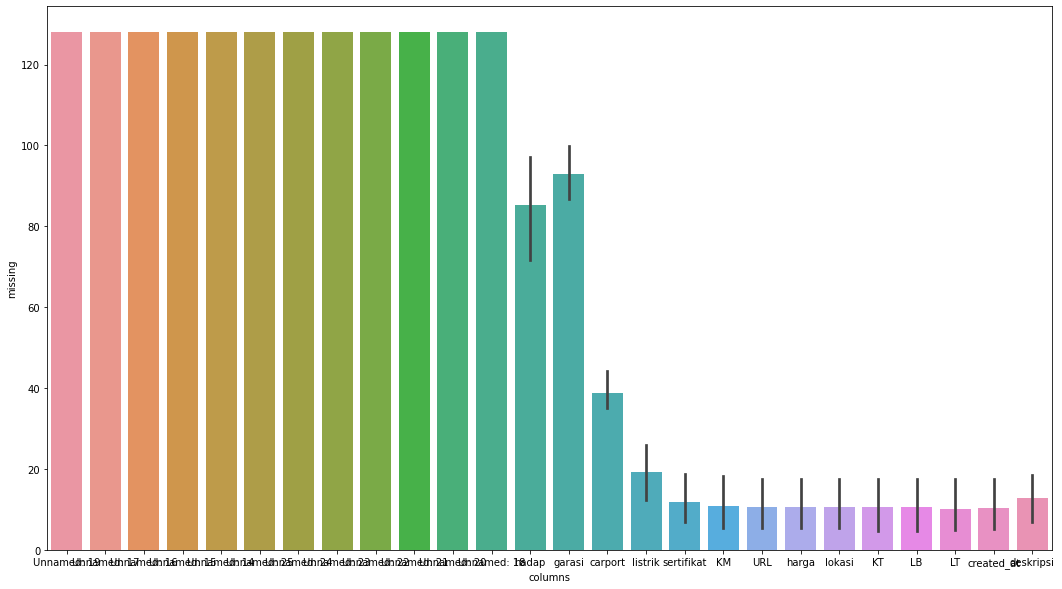

In [20]:
plt.figure(figsize=(18,10))
bp=sns.barplot(x='columns',y='missing', data=dnull)
bp.figure.savefig('missing_value.jpg')

In [35]:
df.drop(labels=['Unnamed'], axis=1, inplace=False)

KeyError: "['Unnamed'] not found in axis"

In [23]:
df = df[pd.notnull(df['Unnamed'])]

KeyError: 'Unnamed'